<a href="https://colab.research.google.com/github/Ruchit42/Online_News_Shares/blob/main/Capstone_News_shares_current_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Libraries important for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# Load the csv file which contains the dataset
df = pd.read_csv('/content/sample_data/OnlineNewsPopularity.csv',index_col = 0)#--setting index col allows selecting data by labels (further below)



In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
#understanding the descriptive information about the data
df.describe()

#Preparing data for analysis

In [ ]:
df.info()

* Almost all of the variables are float data type and the targer variable is of type int


In [ ]:
# Check for any null values
df.isnull().sum()

* No NULL values!!!

In [ ]:
# Define a function that combines features into a single category
def combine_features(row):
    if row['data_channel_is_lifestyle'] == 1 :
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Tech'
    elif row['data_channel_is_world'] == 1:
        return 'World'
df['data_channel'] = df.apply(combine_features, axis=1)


In [ ]:
# Define a function that combines features into a single category
def combine_features(row):
    if row['weekday_is_monday'] == 1 :
        return 'Monday'
    elif row['weekday_is_tuesday'] == 1:
        return 'Tuesday'
    elif row['weekday_is_wednesday'] == 1:
        return 'Wednesday'
    elif row['weekday_is_thursday'] == 1:
        return 'Thursday'
    elif row['weekday_is_friday'] == 1:
        return 'Friday'
    elif row['weekday_is_saturday'] == 1:
        return 'Saturday'
    elif row['weekday_is_sunday'] == 1:
        return 'Sunday'
df['day_published'] = df.apply(combine_features, axis=1)


In [ ]:
# Checking for duplicates in our dataframe
#Check for dulicate rows except the first occurrence
df.duplicated()

In [ ]:
df['data_channel']

In [ ]:
df['day_published']

In [ ]:
sns.histplot(df['shares'], bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [ ]:
# For numerical variables
df['shares'].describe()

In [ ]:
df['shares'].nlargest(100)

In [ ]:
# Box plot for outlier detection
plt.boxplot(df['shares'])
plt.show()

In [ ]:
sns.histplot(df['shares'].nlargest(100), bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [ ]:
df['shares'].nsmallest(100)

In [ ]:
sns.histplot(df['shares'].nsmallest(100), bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [ ]:
df[df.columns[1:]].corr()['shares'][:]


* No signs of Strong Correlation to the target variable "shares'

In [ ]:
# Create a scatter plot

plt.scatter(df['global_subjectivity'], df['shares'], color='blue', alpha=0.7)
plt.xlabel('Continuous Variable')
plt.ylabel('Target Variable')
plt.title('Relationship between global_subjectivity and shares')
plt.grid(True)
plt.show()

In [ ]:
# Create a scatter plot

plt.scatter(df['num_keywords'], df['shares'], color='blue', alpha=0.7)
plt.xlabel('Continuous Variable')
plt.ylabel('Target Variable')
plt.title('Relationship between global_subjectivity and shares')
plt.grid(True)
plt.show()

In [ ]:
plt.bar(df['day_published'], df['shares'])

# Add titles and labels
plt.title('Bar Graph Example')
plt.xlabel('data channel')
plt.ylabel('# of shares')

# Show the plot
plt.show()

In [ ]:
sns.histplot(binwidth=0.5, x="data_channel", data=df, stat="percent", multiple="stack")


In [ ]:
sns.histplot(binwidth=0.5, x="day_published", hue="data_channel", data=df, stat="percent", multiple="stack")


In [ ]:
plt.scatter(df['timedelta'], df['shares'])

# Optionally add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Show the plot
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
# For simplicity, let's consider all the columns as features except for the target 'shares' for now.
X = df.drop(columns=['shares','data_channel','day_published'])
y = df['shares']

In [ ]:
# Log-transform the target variable to reduce the effect of very large share counts
y_log = np.log1p(y)

# Split the data into training and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

In [ ]:
# Function to train and evaluate models
def train_evaluate(models, X_train, y_train, X_test, y_test):
    rmsle_scores = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred_log = model.predict(X_test)
        # Calculate RMSLE
        rmsle_score = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_log)))
        rmsle_scores[name] = rmsle_score
    return rmsle_scores


In [ ]:
# Train and evaluate models
rmsle_scores = train_evaluate(models, X_train_scaled, y_train_log, X_test_scaled, y_test_log)
rmsle_scores


## Improving RMSLE scores
* GradientBoostingRegressor had the best RMSLE score.
* Goal is to improve the GradientBoostingRegressor Model even further by tuning Hyperparameters and reducing noice.

#Implement Feature Engineering
* Eliminate Noise in the data
* Only include data with correlation


In [ ]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Correcting the data splitting process to match the length of the log-transformed target
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Create a pipeline that includes standardization and linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())
rfecv = RFECV(estimator=pipeline['linearregression'], step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_log_train)
optimal_features = X_train.columns[rfecv.support_]
final_pipeline = make_pipeline(StandardScaler(), LinearRegression())
final_pipeline.fit(X_train[optimal_features], y_log_train)

# Perform cross-validation to evaluate the model using RMSLE
# We have to make a custom scorer since scikit-learn does not have RMSLE by default
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Cross-validation scores
cv_scores_rmsle = cross_val_score(final_pipeline, X_train[optimal_features], y_log_train, cv=5, scoring=rmsle_scorer)

# The mean RMSLE across the folds
mean_rmsle = -cv_scores_rmsle.mean()

optimal_features, mean_rmsle


In [ ]:
# Create a pipeline that standardizes the data then applies Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
params = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_log_train)
best_alpha = grid_search.best_params_['ridge__alpha']
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
coefficients = best_model.named_steps['ridge'].coef_

coefficients


In [ ]:
ridge_coefficients = best_model.named_steps['ridge'].coef_
feature_coefficients = pd.DataFrame(data=ridge_coefficients, index=X_train.columns, columns=['Coefficient'])
most_influential_features = feature_coefficients.abs().sort_values(by='Coefficient', ascending=False)

# Display the most influential features
print(most_influential_features)


In [ ]:
def remove_outliers_iqr(df, column_name, threshold=1.5):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Remove outliers from the DataFrame
filtered_df = remove_outliers_iqr(df, 'shares')

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_df)

In [ ]:
# Now after getting the most_influential_features results , let's consider all important columns as features except for the target 'shares'
# Only including the top 25 features with the higest coefficient
X = filtered_df.drop(columns=['shares','data_channel','day_published'])
y = filtered_df['shares']

In [ ]:
# Log-transform the target variable to reduce the effect of very large share counts
y_log = np.log1p(y)

# Split the data into training and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train and evaluate models
rmsle_scores = train_evaluate(models, X_train_scaled, y_train_log, X_test_scaled, y_test_log)
rmsle_scores


# Improvement
After taking out the outliers, the gradiant boosting is still supiorior.
* Next goal is to try and optimize the model to get a better score

In [ ]:

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Define distributions for hyperparameters
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train_scaled, y_train_log)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on your test data
best_score = best_model.score(X_test, y_test_log)
print("Best Model Score:", best_score)


In [ ]:
# Create a GradientBoostingRegressor model with custom hyperparameters
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.10121399684340719,
    max_depth=5,
    random_state=42
)

# Train the model on the training data
model.fit(X_train_scaled, y_train_log)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate RMSLE
rmsle_score = np.sqrt(mean_squared_log_error(np.expm1(y_test_log), np.expm1(y_pred)))

rmsle_score


0.5549698332806907

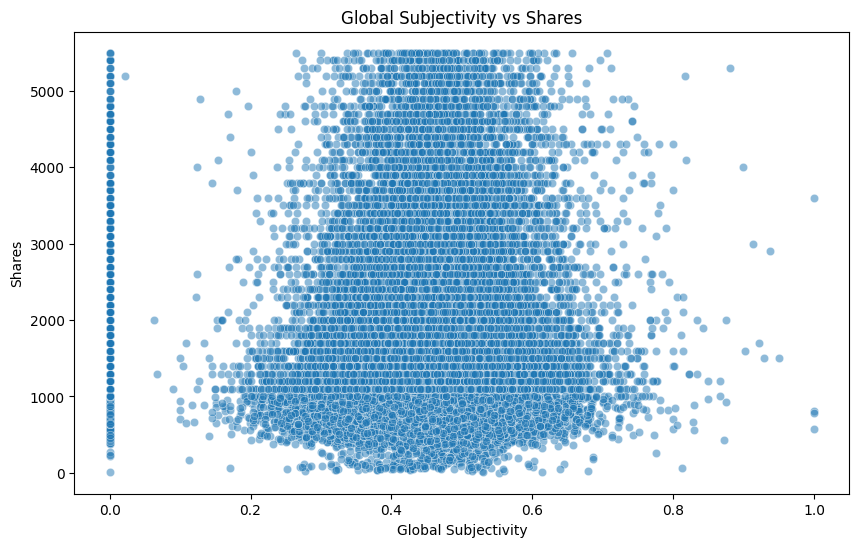

0.05829045465608975

In [51]:
# Checking if the dataset contains the 'global_subjectivity' column
if 'global_subjectivity' in filtered_df.columns:
    # Plotting the relationship between global subjectivity and shares
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x='global_subjectivity', y='shares', alpha=0.5)
    plt.title('Global Subjectivity vs Shares')
    plt.xlabel('Global Subjectivity')
    plt.ylabel('Shares')
    plt.show()

    # Calculating the correlation coefficient
    correlation = filtered_df['global_subjectivity'].corr(filtered_df['shares'])
else:
    correlation = "Column 'global_subjectivity' not found in the dataset"

correlation
